In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def ip(img_print):
    if len(img_print.shape) == 2:
        plt.figure(figsize=(20,15))
        plt.imshow(img_print, cmap='gray')
    else:
        plt.figure(figsize=(15,10))
        plt.imshow(img_print[:,:,::-1])
    print(img_print.shape)

def hsvp(img_print):
    x =cv2.cvtColor(img_print, cv2.COLOR_2RGB)
    plt.figure(figsize=(15,10))
    plt.imshow(x)

### Template Matching

In [23]:
# Load img/WandoScene.jpg  as the main image
img = cv2.imread("img/WaldoScene3.jpg")
img_resize = cv2.resize(img,(int(img.shape[1]), int(img.shape[0])))
ibg = cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)
print(ibg.shape)
# Load img/waldo.jpg as the template
img_tmp = cv2.imread("img/waldo.jpg",0)
tmp = cv2.resize(img_tmp,(int(img_tmp.shape[1]), int(img_tmp.shape[0])))
print(tmp.shape)
# Corvert the images to grayscale
# cv2.imwrite('img/img_resize.jpg', img_resize)
# cv2.imwrite('img/tmp_resize.jpg', tmp)

(651, 1300)
(394, 285)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(651, 1300, 3)


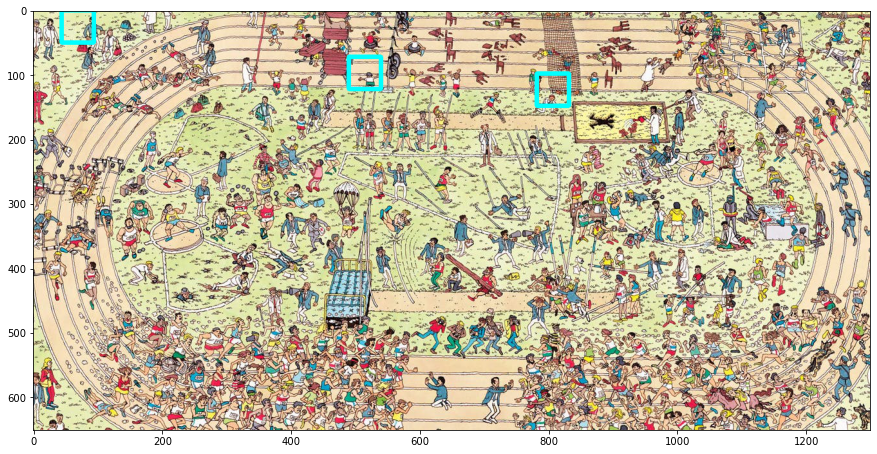

In [24]:
# Try with different waldo scenes
#template_contours, h = cv2.findContours(tmp_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) ## try CHAIN_APPROX_SIMPLE
#image_contours, img_h = cv2.findContours(img_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#for contour in image_contours:
#(2686, 3800, 3)
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

img_copy = img_resize.copy()
w, h = tmp.shape[::-1]

for meth in methods:
    method = eval(meth)
    match = cv2.matchTemplate(ibg, tmp, method)
    print(type(match))
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(match)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0]+50, top_left[1]+50)
    cv2.rectangle(img_copy, top_left, bottom_right, (255,255,0), 5)
ip(img_copy)

In [204]:
# How well did it work?, did it perform well with other images? 
